In [ ]:
!pip install pandas
!pip install qiskit==0.39.2
!pip install numpy
!pip install seaborn
!pip install matplotlib
!pip install scipy


In [1]:
import json
import matplotlib.pyplot as plt
import numpy as np
from scipy import sparse
import shin_metiu_full as sf
import matplotlib as mpl

# import ipywidgets as widgets
import pandas as pd
import seaborn as sns

from ansatze import hweff_ansatz
from qiskit import Aer
from exact_simulator import prep_ham, simulation, inner
from helpers import read_files

from auto_plotter import autoplotter, prep_dfs
import warnings

mpl.rcParams['text.usetex'] = True

warnings.filterwarnings("ignore")
warnings.filterwarnings("ignore")
sns.set_context(
    "talk",
    rc={
        "text.usetex": True,
        "font.size": 18,
        "axes.titlesize": 18,
        "axes.labelsize": 18,
        "xtick.labelsize": 16,
        "ytick.labelsize": 16,
        "legend.fontsize": 16,
        "legend.loc": "lower left",
        "legend.frameon": False,
        "font.family": "serif",
        "font.serif": "Times New Roman",
    },
)

backend = Aer.get_backend("statevector_simulator")
name1, name2 = 'Single', 'MD'

df1,df_coef1=read_files(100,1000,'results_helix/co_single/single_',ending='.json')
df2,df_coef2=read_files(100,1000,'results_helix/co_md/MD_',ending='0.json')


/home/danielb/miniconda3/envs/qiskit/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [5]:
info = json.load(open("results_helix/co_single/single_0.json","r"))
info.keys()

dict_keys(['QC_energy_el', 'dt', 'depth', 'r_r', 'r_f', 'r_l', 'L', 'res', 'trotter_steps', 'parameterized', 'padding', 'fidelity_to_ideal', 'fidelity_to_exact', 'QC_energy_Tnuc', 'QC_energy_Vnuc', 'QC_coefficients', 'QC_energy', 'ideal_energy', 'total_energy', 'ideal_coefficients', 'ideal_forces_el', 'ideal_forces_nuc', 'ideal_tot_forces', 'ideal_velocities', 'ideal_positions', 'ideal_energy_el', 'ideal_energy_Tnuc', 'ideal_energy_Vnuc', 'exact_coefficients', 'exact_forces_el', 'exact_forces_nuc', 'exact_tot_forces', 'exact_velocities', 'exact_positions', 'exact_energy_el', 'exact_energy_Tnuc', 'exact_energy_Vnuc', 'exact_energy', 'force', 'err_force', 'energy', 'err_energy', 'init_F', 'QC_positions', 'QC_velocities', 'QC_tot_forces', 'QC_forces_nuc', 'QC_forces_el', 'final_F', 'err_init_F', 'err_fin_F', 'iter_number', 'times', 'params', 'tot_steps', 'final_i'])

In [18]:
info['QC_positions']

[-2.0,
 -1.9994298280243998,
 -1.998859312398177,
 -1.998288453440616,
 -1.997717251466164,
 -1.9971457067812792,
 -1.9965738196812126,
 -1.9960015904491988,
 -1.9954290193573152,
 -1.994856106666875,
 -1.9942828526299279,
 -1.9937092574905981,
 -1.9931353214872913,
 -1.9925610448561053,
 -1.9919864278349102,
 -1.9914114706694526,
 -1.9908361736184144,
 -1.9902605369417399,
 -1.9896845608903353,
 -1.989108245697538,
 -1.9885315915725499,
 -1.9879545986960243,
 -1.9873772672179066,
 -1.986799597257511,
 -1.9862215889057266,
 -1.9856432422292312,
 -1.9850645572766004,
 -1.984485534086185,
 -1.9839061726954812,
 -1.983326473151446,
 -1.98274643552092,
 -1.9821660599001398,
 -1.9815853464223774,
 -1.981004295262976,
 -1.9804229066413699,
 -1.9798411808199936,
 -1.979259118100333,
 -1.9786767188166983,
 -1.9780939833286113,
 -1.9775109120128276,
 -1.9769275052559467,
 -1.9763437634482863,
 -1.9757596869793446,
 -1.9751752762348527,
 -1.9745905315952221,
 -1.974005453435103,
 -1.973420042123

In [14]:
mpl.rcParams['text.usetex'] = False
from matplotlib import ticker
formatter = ticker.ScalarFormatter(useMathText=True)
formatter.set_scientific(True) 


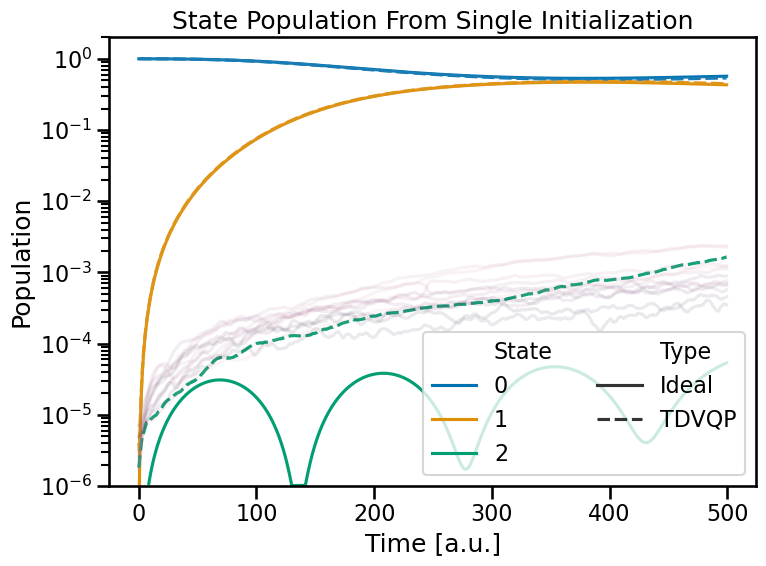

In [15]:
fig, ax = plt.subplots(figsize=((8, 6)))
sns.lineplot(data=df_coef1.query('State<3 & Population>1e-6&Type!="Exact"'),x='Time',y='Population',hue='State',style='Type',ci=None,ax=ax,palette=sns.color_palette("colorblind"))
sns.lineplot(data=df_coef1.query('State<16 & Population>1e-6 &Type=="TDVQP"'),x='Time',y='Population',hue='State',style='Type',ci=None,ax=ax,legend=None,alpha=0.1)
plt.xlabel(r'Time [a.u.]')
plt.ylim([1e-6,2])
plt.yscale('log')
plt.title(r'State Population From Single Initialization')
handles, labels = plt.gca().get_legend_handles_labels()

# Create legend
plt.legend(handles=handles, labels=labels, ncol=2)

plt.tight_layout()
plt.savefig('./custom_plots/single_populations.pdf')

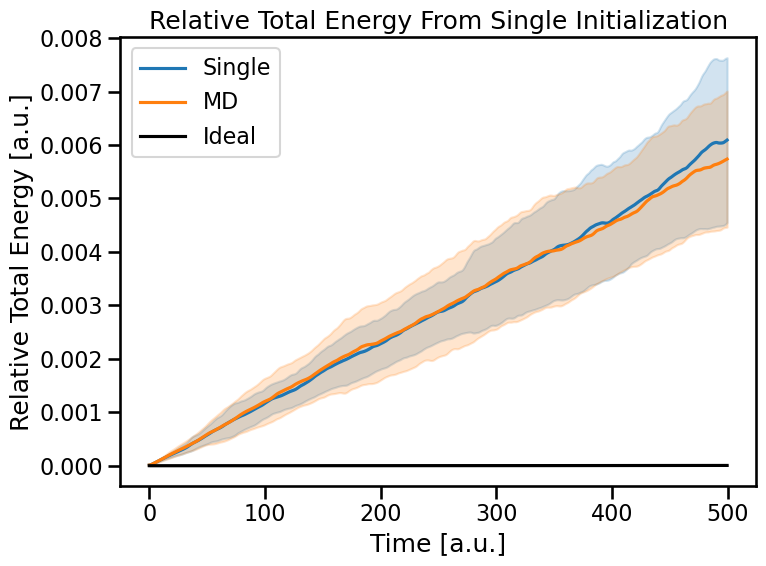

In [16]:
fig, ax = plt.subplots(figsize=((8, 6)))
sns.lineplot(data=df1, x="times", y="QC_energy_rel", ci='sd', ax=ax, palette="Set2",label=f'Single')
sns.lineplot(data=df2, x="times", y="QC_energy_rel", ci='sd', ax=ax, palette="Set2",label=f'MD')
sns.lineplot(data=df1, x="times", y="ideal_energy_rel", ci='sd', ax=ax,label='Ideal',color='black')

plt.ylabel(r'Relative Total Energy [a.u.]')
plt.xlabel(r'Time [a.u.]')
plt.title(r'Relative Total Energy From Single Initialization')
# handles, labels = ax.get_legend_handles_labels()
# l = plt.legend([handles[i] for i in [0,1,3]], [labels[i] for i in [0,2,4]])
plt.tight_layout()
plt.savefig("plots/timestep_comparison_energy.pdf")

In [65]:
df1['times_scaled'] = df1['times']*2
df2['times_scaled'] = df2['times']*20

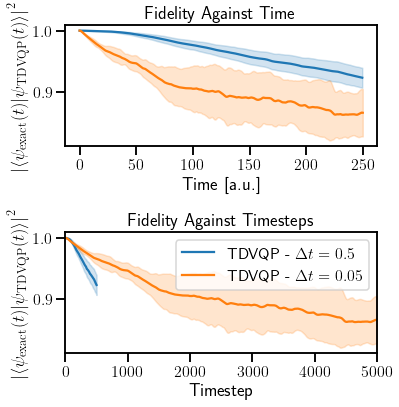

In [88]:
fig, ax = plt.subplots(nrows=2,figsize=((6, 6)))

sns.lineplot(data=df1, x="times", y="fidelity_to_exact", ci='sd', ax=ax[0], palette="Set2")
sns.lineplot(data=df2, x="times", y="fidelity_to_exact", ci='sd', ax=ax[0], palette="Set2")
ax[0].set(ylabel=r'$\left |\langle\psi_\mathrm{exact}(t)|\psi_\mathrm{TDVQP}(t)\rangle\right |^2 $',xlabel= r'Time [a.u.]')
ax[0].set_title('Fidelity Against Time')


sns.lineplot(data=df1, x="times_scaled", y="fidelity_to_exact", ci='sd', ax=ax[1], palette="Set2",label=f'TDVQP - $\Delta t=0.5$')
sns.lineplot(data=df2, x="times_scaled", y="fidelity_to_exact", ci='sd', ax=ax[1], palette="Set2",label=f'TDVQP - $\Delta t=0.05$')
ax[1].set(ylabel=r'$\left |\langle\psi_\mathrm{exact}(t)|\psi_\mathrm{TDVQP}(t)\rangle\right |^2 $',xlabel= r'Timestep',xlim=[0,5000])
ax[1].set_title('Fidelity Against Timesteps')
plt.tight_layout()
plt.savefig('plots/fidelityVStimesteps.pdf')

[Text(0, 0.5, '$F_\\mathrm{el}$'),
 Text(0.5, 0, 'Time [a.u.]'),
 Text(0.5, 1.0, 'Electron Force From Single Initialization')]

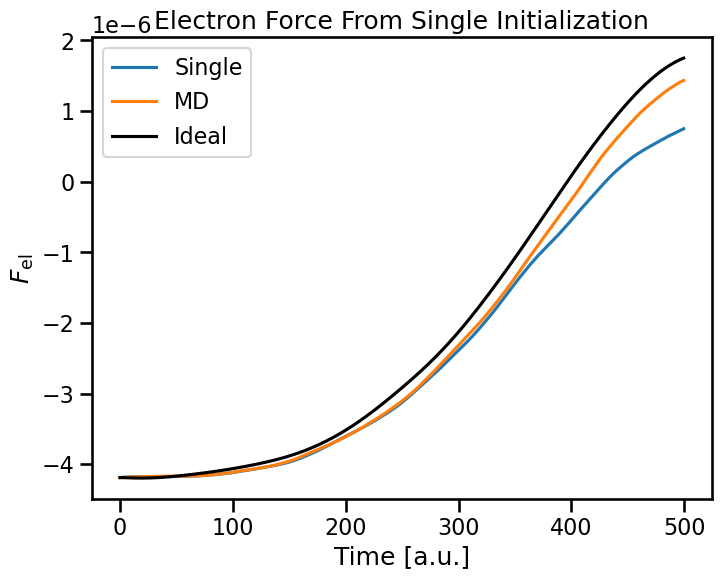

In [17]:
fig, ax = plt.subplots(figsize=((8, 6)))
# sns.lineplot(data=sdf, x="times", y="QC_forces_el", ax=ax, units="sample", estimator=None, alpha=0.05,label=None)
# plt.legend('')
sns.lineplot(data=df2, x="times", y="QC_forces_el", ci=None, ax=ax, palette="Set2",label=f'Single')
sns.lineplot(data=df1, x="times", y="QC_forces_el", ci=None, ax=ax, palette="Set2",label=f'MD')
sns.lineplot(data=df1, x="times", y="ideal_forces_el", ci=None, ax=ax,color='black', label='Ideal')
# handles, labels = ax.get_legend_handles_labels()
# l = plt.legend([handles[i] for i in [0,1,3]], [labels[i] for i in [0,1,3]])
ax.set(ylabel='$F_\mathrm{el}$',xlabel= r'Time [a.u.]',title='Electron Force From Single Initialization')
# plt.savefig("custom_plots/S_force_long.pdf")

[Text(0, 0.5, '$F_\\mathrm{el}$'),
 Text(0.5, 0, 'Time [a.u.]'),
 Text(0.5, 1.0, 'Electron Force From Single Initialization')]

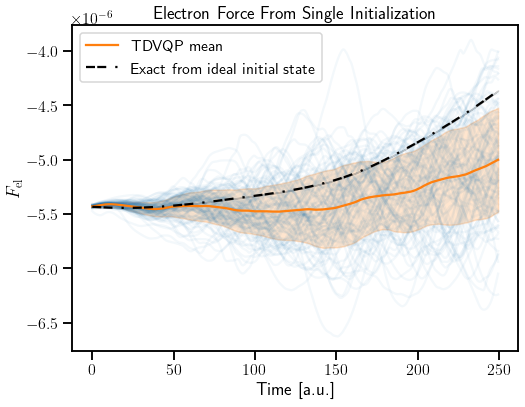

In [94]:

fig, ax = plt.subplots(figsize=((8, 6)))
sns.lineplot(data=df1, x="times", y="QC_forces_el", ax=ax, units="sample", estimator=None, alpha=0.05,label=None)
sns.lineplot(data=df1, x="times", y="QC_forces_el", errorbar=("sd",1), estimator=np.mean, ax=ax, alpha=1, label = 'TDVQP mean')
sns.lineplot(data=df1, x="times", y="ideal_forces_el", errorbar="sd", ax=ax,color='black', label='Exact from ideal initial state',style='err_energy', dashes=[(4,1,4)])
handles, labels = ax.get_legend_handles_labels()

l = plt.legend([handles[i] for i in [0,1]], [labels[i] for i in [0,1]])
ax.set(ylabel='$F_\mathrm{el}$',xlabel= r'Time [a.u.]',title='Electron Force From Single Initialization')
# plt.savefig("custom_plots/S_force_long.pdf")

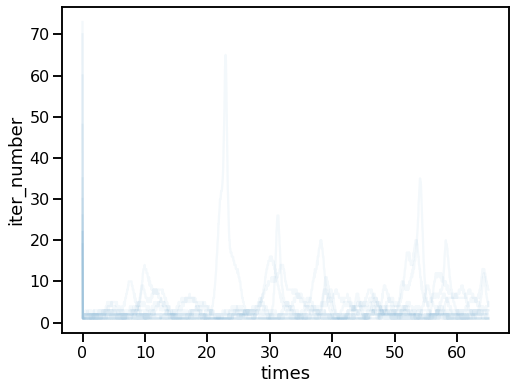

In [8]:
fig, ax = plt.subplots(figsize=((8, 6)))
# sns.lineplot(data=df, y="iter_number", x="times", ax=ax, errorbar=(lambda x: (np.percentile(x, 25), np.percentile(x, 75))))

sns.lineplot(data=df, x="times", y="iter_number", ax=ax, units="sample", estimator=None,alpha=0.05)

plt.show()

In [ ]:
fig, ax = plt.subplots(figsize=((10, 10)))

df['diff_pos'] = (df['QC_positions']-df["ideal_positions"])**2
sns.lineplot(
    data=df, x="times", y="diff_pos", errorbar=(lambda x: (np.percentile(x, 25), np.percentile(x, 75))), estimator=np.mean, ax=ax, alpha=1, label = 'QC mean'
)

ax.set_ylabel('RMS Difference in nuclear Position')
plt.show()

<AxesSubplot: xlabel='QC_velocities', ylabel='Count'>

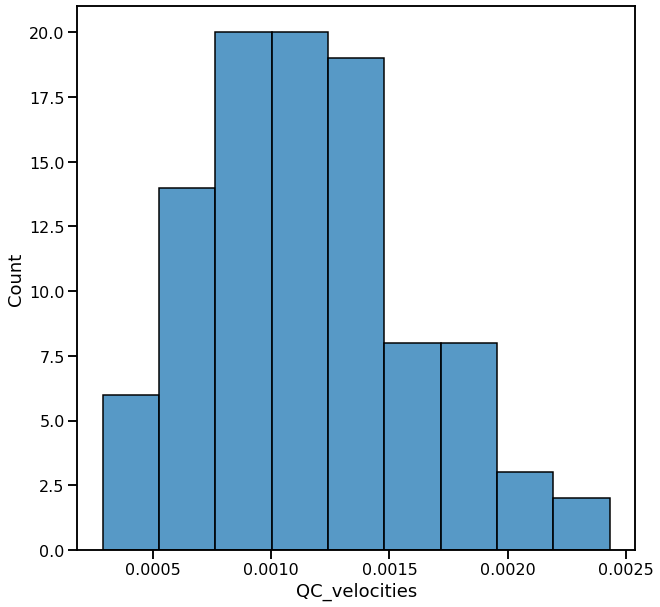

In [38]:
fig, ax = plt.subplots(figsize=((10, 10)))
sns.histplot(data=df.query('times==0'), x="QC_velocities",ax=ax)
sns.histplot(data=df.query('times==10'), x="ideal_velocities",ax=ax)

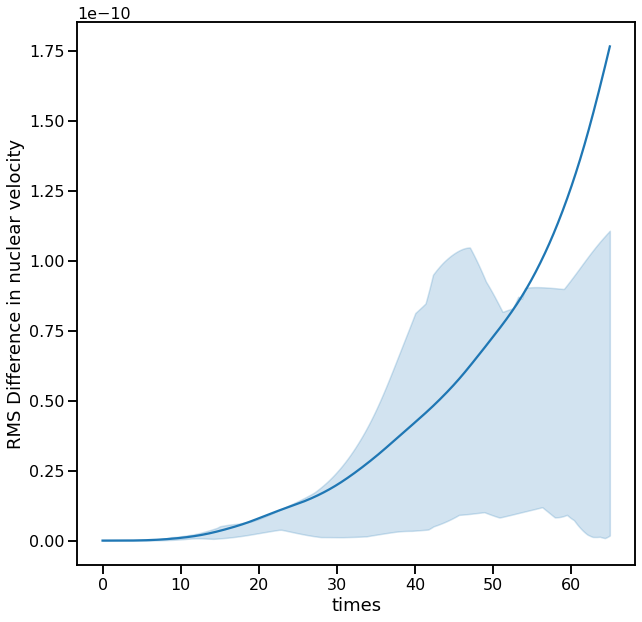

In [10]:
fig, ax = plt.subplots(figsize=((10, 10)))

df['diff_vel'] = (df['QC_velocities']-df["ideal_velocities"])**2
sns.lineplot(
    data=df, x="times", y="diff_vel", errorbar=(lambda x: (np.percentile(x, 25), np.percentile(x, 75))), estimator=np.mean, ax=ax, alpha=1, #label = 'QC mean'
)

ax.set_ylabel('RMS Difference in nuclear velocity')
plt.show()

In [ ]:
def plot(p,y,sc0,sc1):
    fig = plt.figure()
    gs = fig.add_gridspec(2, hspace=0.1, height_ratios=[2, 1])
    axs = gs.subplots(sharex=True)
    fig.suptitle(p)
    df[f'diff_{p}']=np.sqrt((df[f"exact_{p}"] - df[f"QC_{p}"])**2)
    sns.lineplot(ax=axs[1],data=df,x=f'times',y=f'diff_{p}',legend=None)
    sns.lineplot(ax=axs[0],
        data=df,y=f"exact_{p}",x='times',
        color="black",
        label="Exact",
    )
    sns.lineplot(ax=axs[0],
        data=df,y=f"QC_{p}",x='times',
        color="red",
        label="TDVQP",
    )
    axs[1].set_ylabel(f'RMSD ${sc1}$')
    axs[0].set_ylabel(f'{y} [a.u.] ${sc0}$')
    axs[0].set_xlabel('Time [a.u.]')
    axs[1].set_xlabel('Time [a.u.]')

    axs[0].ticklabel_format(style='sci', axis='y', scilimits=(0,0))
    axs[1].ticklabel_format(style='sci', axis='y', scilimits=(0,0))

    # axs[0].set_yscale('log')
    # axs[0].legend()
    # axs[1].legend(loc=4)
    # axs[0].set_yscale('log')
    # axs[1].set_yscale("log")
    plt.tight_layout()
    plt.show()
    
plot("velocities",'Velocity','\\cdot10^{-1}','\\cdot10^{-5}')

In [ ]:
plot("positions",'Position','\\cdot10^{0}','\\cdot10^{-5}')

In [ ]:
plot("positions",'Position','\\cdot10^{sc1}','\\cdot10^{-4}')